In [1]:
import pickle
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline
fig_width = 15

from aSPEM import Analysis
import bayesianchangepoint as bcp

In [3]:
mode = 'enregistrement'
from aSPEM import Analysis
e = Analysis(observer='AM', mode=mode)
Full = e.Full_list(modes_bcp=None)

In [4]:
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']
nb_sujet = len(list_sujet)

In [5]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
            
BET = {}
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in list_sujet:
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            BET[liste[x][1]] = b

# Scaling Data

In [6]:
e = Analysis(observer='AM', mode='enregistrement')
Full = e.Full_list(modes_bcp=None)

In [7]:
file = os.path.join('parametre', 'Data_Scaling.pkl')
with open(file, 'rb') as fichier:
    new_data = pickle.load(fichier, encoding='latin1')

In [8]:
new_bet_full = new_data['new_bet_full']
new_bet_sujet = new_data['new_bet_sujet']
new_va_full = new_data['new_va_full']
new_va_sujet = new_data['new_va_sujet']

# Variation de h

In [9]:
file = os.path.join('parametre', 'list_h.pkl')
with open(file, 'rb') as fichier:
    list_h = pickle.load(fichier, encoding='latin1')

# Scaling Fit

In [10]:
Jeffreys = True
p0, r0 = .5, 2. - Jeffreys

list_p_hat = {}

for l in list_h.keys() :
    print('\n', l, sep='')
    list_p_hat[l] = {}
    
    for m in list_h[l].keys() :
        print(m, list(list_h[l][m].keys()))
        
        list_p_hat[l][m] = {}
        
        for s in list_h[l][m] :            
            list_p_hat[l][m][s] = []
            
            for b in range(len(list_h[l][m][s])) :
                
                if m=='pause' :
                    debut = BET[s]['N_trials']*(b//4)
                    fin = BET[s]['N_trials']+debut
                elif m=='block':
                    debut = BET[s]['N_trials']*b
                    fin = BET[s]['N_trials']+debut
                elif m == 'sujet' :
                    debut = BET[s]['N_trials']*b
                    fin = BET[s]['N_trials']*BET[s]['N_blocks']
                
                bino = np.array(list(Full['bino'][Full.sujet==s])[debut:fin])
                
                if m=='pause' :
                    liste = [0,50,100,150,200]
                    bino = bino[liste[(b%4)]:liste[(b%4)+1]]
                
                p_bar, r, beliefs = bcp.inference(bino, h=list_h[l][m][s][b], p0=p0, r0=r0, verbose=False)
                p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode='mean', p0=p0)
                list_p_hat[l][m][s].append(p_hat)


h_bet_full
pause ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
sujet ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
block ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']

h_va_sujet
pause ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
sujet ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
block ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']

h_bet_sujet
pause ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
sujet ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
block ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']

h_va_full
pause ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
sujet ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP', 'OP']
block ['AM', 'TN', 'DC', 'RS', 'FM', 'SR', 'CS', 'BMC', 'LB', 'YK', 'IP'

In [11]:
scal_list_p_hat = {}
scal_list_p_hat_full = {}

for l in list_p_hat.keys() :
    scal_list_p_hat[l] = {}
    scal_list_p_hat_full[l] = {}
    
    for m in list_p_hat[l].keys() :
        scal_list_p_hat[l][m] = {}
        scal_list_p_hat_full[l][m] = []
        
        scal_full=[]
        for i, s in enumerate(list_p_hat[l][m].keys()) :
            p_hat = []
            for block in range(len(list_h[l][m][s])) :
                p_hat.extend(list_p_hat[l][m][s][block])
            
            scal_full.extend(p_hat)
            scal_list_p_hat[l][m][s] = np.sort(p_hat)
            
            
            
        scal_list_p_hat_full[l][m] = np.sort(scal_full)

In [12]:
import matplotlib.gridspec as gridspec
def plot_scalling(l) :

    fig, ax = plt.subplots(2, 3, figsize=[20, 20/2])
    ax1 = ax[1]
    for a in range(len(ax1)) :
        ax1[a].tick_params(length=0, labelbottom=False, labelleft=False);
        for b in ax1[a].spines.keys() :
            ax1[a].spines[b].set_visible(False)
    
    fig.suptitle(l, fontsize=20)
    
    for x, m in enumerate(list_p_hat[l].keys()) :
        N_cols = 4

        gs1 = gridspec.GridSpecFromSubplotSpec(int(len(list_sujet)/N_cols), N_cols, subplot_spec=ax[1][x], wspace=0.6, hspace=0.6)

        for i, s in enumerate(list_p_hat[l][m].keys()) :

            b = i // N_cols
            a = i % N_cols

            ax2 = plt.Subplot(fig, gs1[i])
            fig.add_subplot(ax2)
            ax2.set_title(s)
            ax2.plot(scal_list_p_hat[l][m][s], np.linspace(0, 1, len(scal_list_p_hat[l][m][s])), c='k')
            ax2.xaxis.set_ticks([0,1])
            ax2.yaxis.set_ticks([0,1])
        ax[0][x].set_title('Full -- %s'%m, fontsize=15)
        ax[0][x].plot(scal_list_p_hat_full[l][m], np.linspace(0,1,len(scal_list_p_hat_full[l][m])), c='k') 

    plt.show()

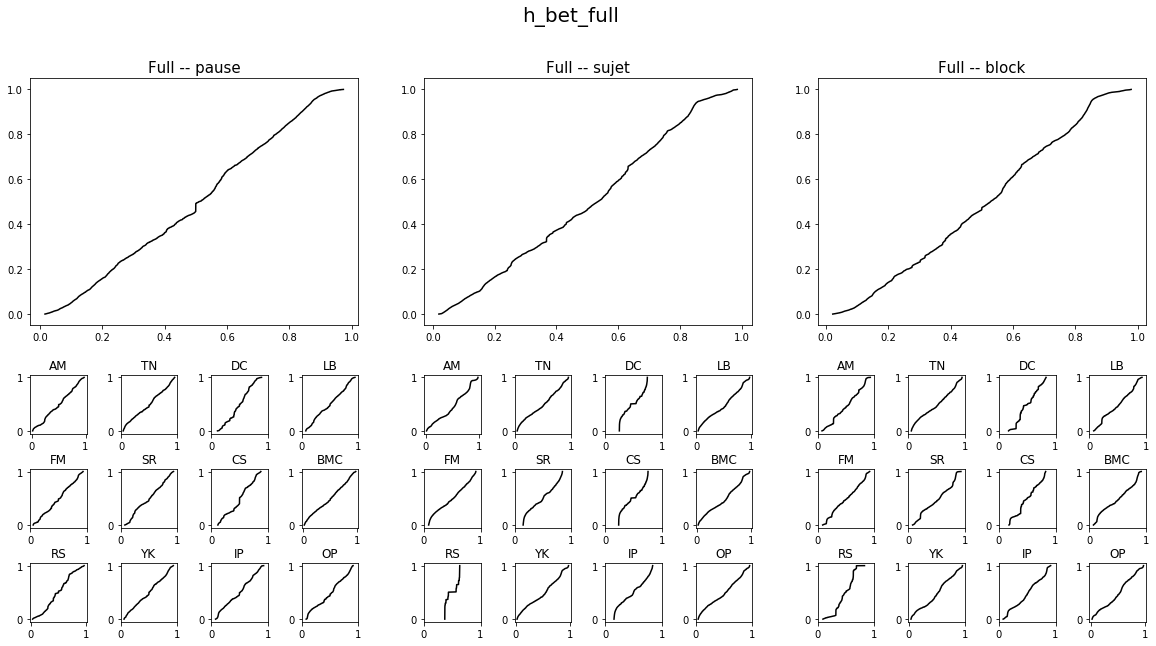

In [13]:
l = 'h_bet_full'
plot_scalling(l)

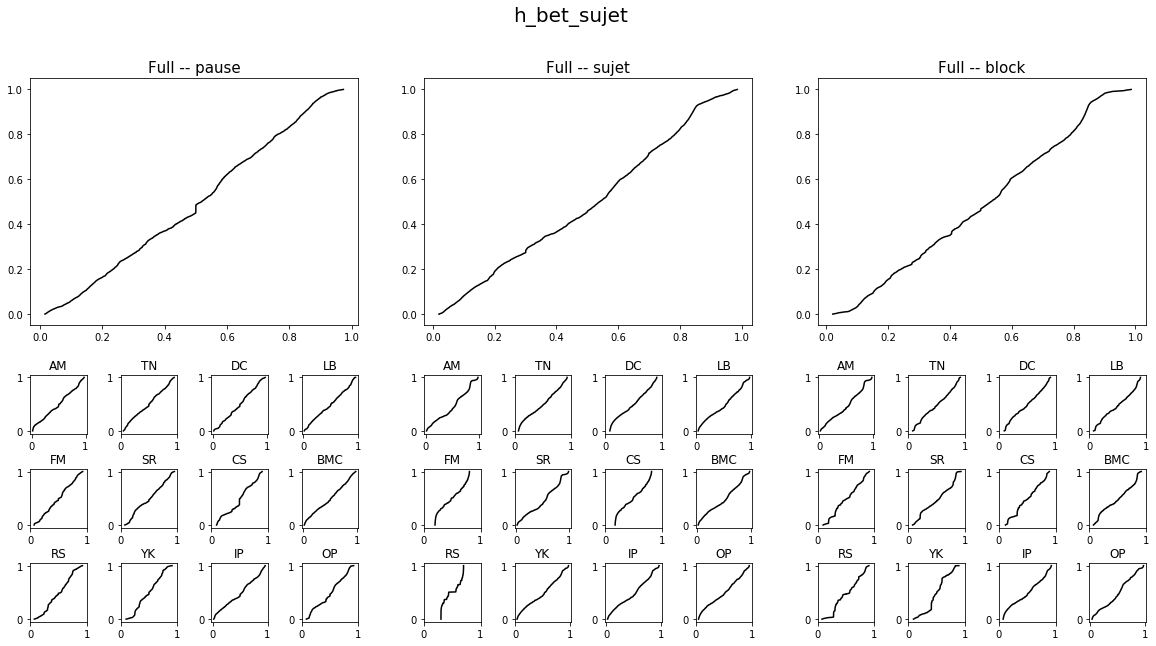

In [14]:
l = 'h_bet_sujet'
plot_scalling(l)

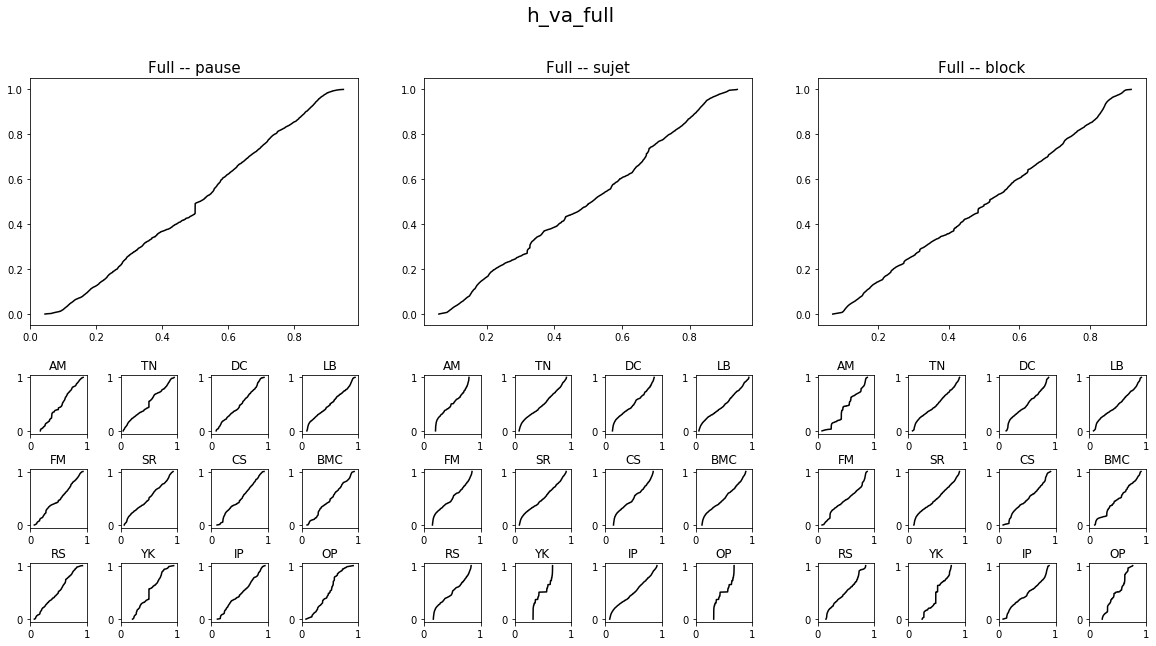

In [15]:
l = 'h_va_full'
plot_scalling(l)

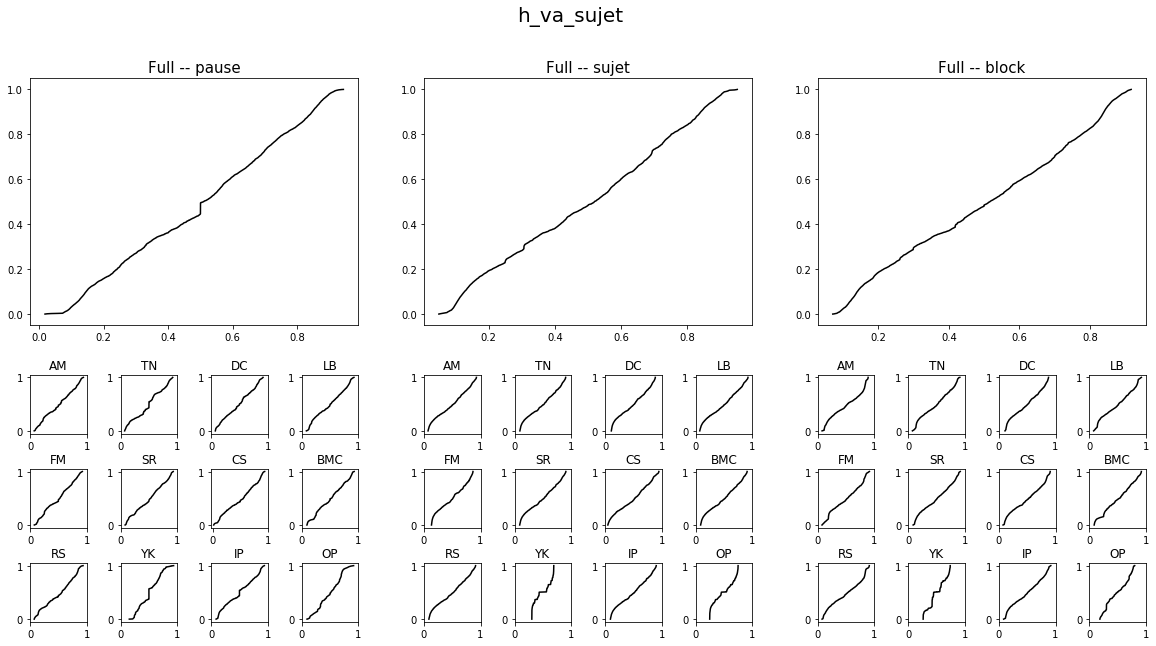

In [16]:
l = 'h_va_sujet'
plot_scalling(l)